In [ ]:
!pip install -Uq git+https://github.com/huggingface/diffusers@main
!pip install -Uq git+https://github.com/huggingface/transformers@main
!pip install -Uq bitsandbytes

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.9 MB/s eta 0:00:00


In [ ]:
from transformers import T5EncoderModel, CLIPTextModelWithProjection
from diffusers import StableDiffusion3Pipeline, SD3Transformer2DModel, AutoencoderKL

import torch

In [ ]:
model_id = "ariG23498/sd3-medium-nf4-pkg"

In [ ]:
text_encoder = CLIPTextModelWithProjection.from_pretrained(model_id, subfolder="text_encoder")
text_encoder_2 = CLIPTextModelWithProjection.from_pretrained(model_id, subfolder="text_encoder_2")
text_encoder_3 = T5EncoderModel.from_pretrained(model_id, subfolder="text_encoder_3")

text_encoder/config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/125M [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/485M [00:00<?, ?B/s]

text_encoder_3/config.json:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
`low_cpu_mem_usage` was None, now default to True since model is quantized.


model.safetensors:   0%|          | 0.00/6.33G [00:00<?, ?B/s]

In [ ]:
transformer = SD3Transformer2DModel.from_pretrained(model_id, subfolder="transformer")
vae = AutoencoderKL.from_pretrained(model_id, subfolder="vae")

transformer/config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/165M [00:00<?, ?B/s]

In [ ]:
pipe = StableDiffusion3Pipeline.from_pretrained(
    "stabilityai/stable-diffusion-3-medium-diffusers",
    transformer=transformer,
    vae=vae,
    text_encoder=text_encoder,
    text_encoder_2=text_encoder_2,
    text_encoder_3=text_encoder_3,
    torch_dtype=torch.float16,
)

  0%|          | 0/28 [00:00<?, ?it/s]

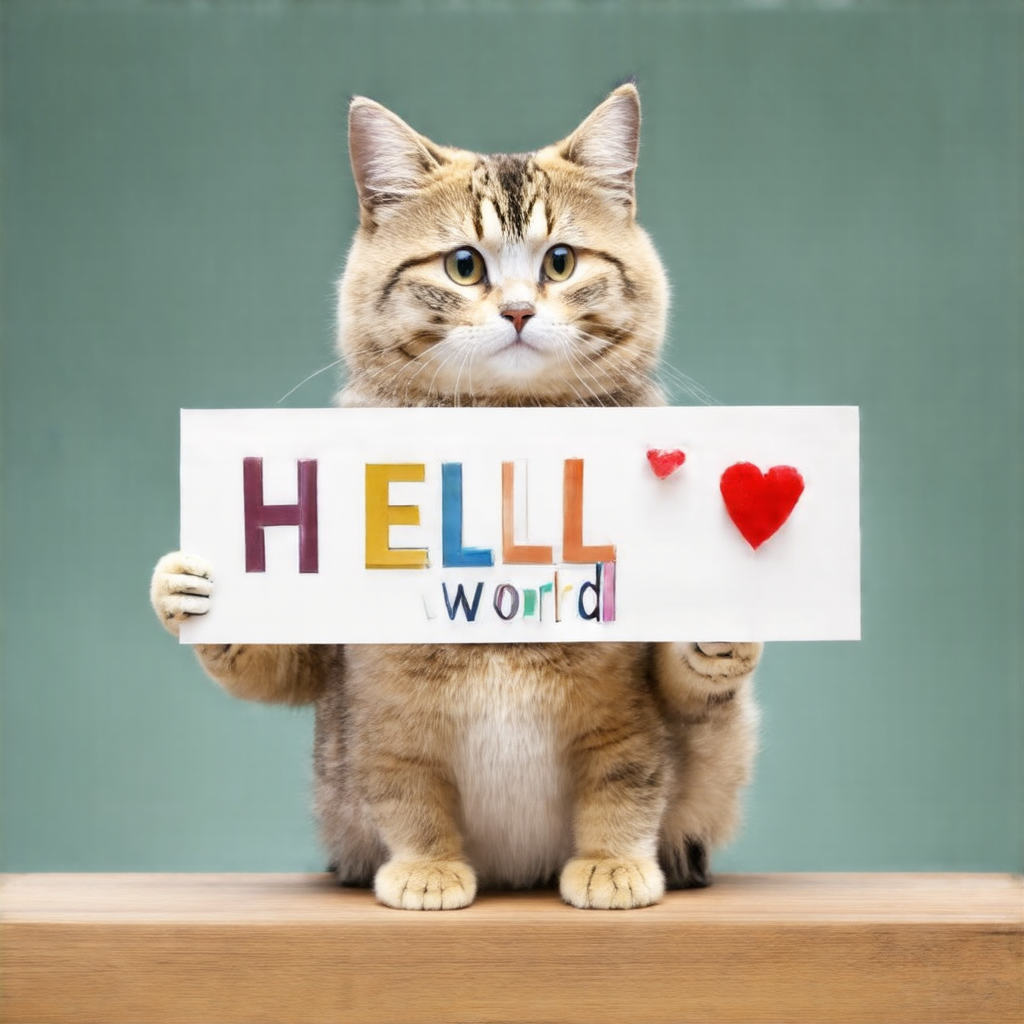

In [ ]:
pipe.enable_model_cpu_offload()

image = pipe(
    "A cat holding a sign that says hello world",
    negative_prompt="",
    num_inference_steps=28,
    guidance_scale=7.0,
).images[0]
image